# 500_prep_missing_values

## Purpose
In this notebook we will get started on cleaning and validating our data, focusing mainly on dealing with missing values in our datasets. 

Due to the size of our Datasets (~ 3 million rows each), we will be performing tasks on only three datasets within this notebook.

As such, we will process each dataset separately, one after the other.

### Notebook Contents:

* __1:__ Loading our Datasets

* __2:__ Handling Missing Data

     * __2.1:__ Dataset 1979 - 2004 (a)
        * __2.1.1__ Locating Missing Data
        * __2.1.2__ Null Values
        * __2.1.3__ Dropping Rows with some Missing Values
        * __2.1.4__ Saving Dataset for 1979 - 2004 to pickle files
        
     * __2.2:__ Dataset 1979 - 2004 (b)
        * __2.2.1__ Locating Missing Data
        * __2.2.2__ Null Values
        * __2.2.3__ Dropping Rows with some Missing Values
        * __2.2.4__ Saving Dataset for 1979 - 2004 to pickle files
      
     * __2.3:__ Dataset 2005 - 2014
        * __2.2.1__ Locating Missing Data
        * __2.2.2__ Null Values
        * __2.2.3__ Question One
        * __2.2.4__ Question Two
        * __2.2.5__ Question Three
        * __2.2.3__ Saving Datasets to pickle files


* __3:__ Creating Data Dictionaries

## Datasets
* __Input__: 

* 300_mapping_values_0514.pkl (Vehicle and Accident Data for all Recorded UK Road Accidents from 2005 - 2014, with values mapped)


* 300_mapping_values_7904a.pkl (First 3 million rows of Vehicle and Accident Data for all Recorded UK Road Accidents from 1979 - 2004 dataset, with values mapped)


* 300_mapping_values_7904b.pkl (Second 3 million rows of Vehicle and Accident Data for all Recorded UK Road Accidents from 1979 - 2004 dataset, with values mapped)


* __Output__: 


* 500_prep_missing_values_0514_Q1AB.pkl (Recorded UK Road Accident Data 2005 - 2014 for RQ1 (A) and (B), with missing values removed)


* 500_prep_missing_values_0514_Q1C.pkl (Recorded UK Road Accident Data 2005 - 2014 for RQ1 (C), with missing values removed)


* 500_prep_missing_values_0514_Q2A.pkl (Recorded UK Road Accident Data 2005 - 2014 for RQ2 (A), with missing values removed)


* 500_prep_missing_values_0514_Q2B.pkl (Recorded UK Road Accident Data 2005 - 2014 for RQ2 (B), with missing values removed)


* 500_prep_missing_values_0514_Q3A.pkl (Recorded UK Road Accident Data 2005 - 2014 for RQ3 (A), with missing values removed)


* 500_prep_missing_values_0514_Q3B.pkl (Recorded UK Road Accident Data 2005 - 2014 for RQ3 (B), with missing values removed)


* 500_prep_missing_values_7904a_Q1AB.pkl (Recorded UK Road Accident Data 1979 - 2004 (a) for RQ1 (A) and (B), with missing values removed)


* 500_prep_missing_values_7904a_Q2B.pkl (Recorded UK Road Accident Data 1979 - 2004 (a) for RQ2 (B), with missing values removed)


* 500_prep_missing_values_7904b_Q1AB.pkl (Recorded UK Road Accident Data 1979 - 2004 (b) for RQ1 (A) and (B), with missing values removed)


* 500_prep_missing_values_df7904b_Q2B.pkl (Recorded UK Road Accident Data 1979 - 2004 (b) for RQ2 (B), with missing values removed)

In [1]:
import os
import sys

import pandas as pd
import numpy as np

module_path = os.path.abspath(os.path.join('../../data/..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from src.helpers import data_dictionary

%matplotlib inline

# 1. Loading the Datasets

Firstly we will read in each of our unput files using the pd.read_pickle method.

In [2]:
df7904a= pd.read_pickle('../../data/processed/300_mapping_values_7904a.pkl')
df7904a.shape

(3000000, 27)

In [2]:
df7904b= pd.read_pickle('../../data/processed/300_mapping_values_7904b.pkl')
df7904b.shape

(2999999, 27)

In [2]:
df0514= pd.read_pickle('../../data/processed/300_mapping_values_0514.pkl')
df0514.shape

(3004425, 27)

# 2. Handling Missing Data

Handling missing data is one of the most important elements of the data cleaning process. Data can be missing for a variety of reasons.


For our analysis there are certain key columns for which we need to ensure we have data. These include: Purpose of journey, longitude, latitude, age of vehicle, urban/rural area, IMD decile, driver home area type. 

Pandas makes it easy for us to remove any rows which have missing data in any of these columns using the dropna method. However, in our datasets we have columns filled with 'unknown', 'other/unknown (2005-10)' and '-1' which indicate a null/missing value. 

We will therefore need to iterate through NaN, -1, other/unknown(2005-10) and unknown values within our datasets.


## 2.1
## Dataset 1979 - 2004 (a)

## 2.1.1
### Locating Missing Data

As a result of our datasets containing null values in three separate forms, we will replace each of these values with 'NaN' below so that we can iterate through all NaN values within the dataset all together.

### '-1' Values

For dealing with our '-1' values, we will replace each occurrance of -1 with an NaN value

In [5]:
df7904a = df7904a.replace(-1,np.NaN)

### Unknown Values

Likewise for unknown values in our dataset, we will replace all occurrences of unknowns with NaN values.

In [6]:
df7904a = df7904a.replace('unknown',np.NaN)

Within our dataset, we also have values labelled 'other/unknown (2005-10)' in our Journey_Purpose_of_Driver column. 

We need to replace each occurrence of this value with NaN in our datset also.

In [7]:
df7904a = df7904a.replace('other/unknown (2005-10)',np.NaN)

## 2.1.2
### Null Values

Now that we have converted all of our missing values to NaN values, We can begin to study which columns are most impacted by missing data. 

The easiest way to do this is by using the Pandas _isnull_ method to check whether a cell is missing data. This method generates True (missing) or False (not missing) values accordingingly.

We can count the missing values by using the _sum_ method to count the number of 'True' values that the _isnull_ method returns (which are treated as 1's).

In [8]:
df7904a.isnull().sum()

Accident_Index                            0
Longitude                           3000000
Latitude                            3000000
Accident_Severity                         0
Number_of_Vehicles                        0
Number_of_Casualties                      0
Date                                      0
Day_of_Week                               0
Time                                    196
Local_Authority_(District)                0
Road_Type                            240568
Speed_limit                               0
Junction_Detail                         247
Light_Conditions                        271
Weather_Conditions                    14862
Road_Surface_Conditions                 264
Special_Conditions_at_Site           278444
Urban_or_Rural_Area                 3000000
Vehicle_Type                          32068
Vehicle_Manoeuvre                      2026
Vehicle_Location-Restricted_Lane     324253
Journey_Purpose_of_Driver           3000000
Sex_of_Driver                   

From the above output, we can see that there are quite a lot of missing values within this dataset.

Below we will plot only the columns which have missing values to see which of these columns are most effected.

In [15]:
cols_to_plot = ['Longitude', 'Latitude', 
       'Time', 'Road_Type',
       'Junction_Detail', 'Light_Conditions', 'Weather_Conditions',
       'Road_Surface_Conditions', 'Special_Conditions_at_Site',
       'Urban_or_Rural_Area', 'Vehicle_Type', 'Vehicle_Manoeuvre',
       'Vehicle_Location-Restricted_Lane', 'Journey_Purpose_of_Driver',
       'Sex_of_Driver', 'Age_Band_of_Driver', 'Age_of_Vehicle',
       'Driver_IMD_Decile', 'Driver_Home_Area_Type'] #define a set of columns to plot

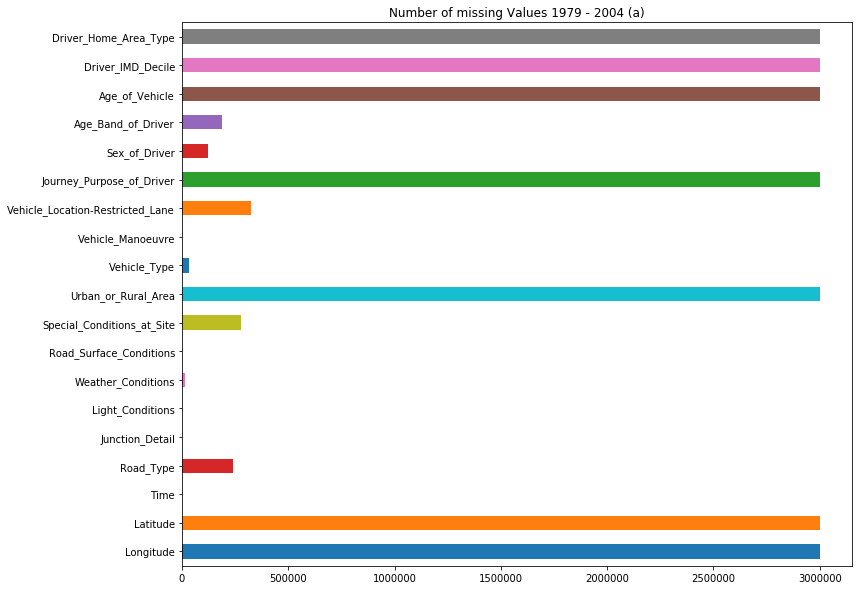

In [10]:
df7904a[cols_to_plot].isnull().sum().plot(figsize=(12,10), kind='barh', title='Number of missing Values 1979 - 2004 (a)') #plot a bar chart of the sum of missing values per column

From the graph above, we can see that unfortunately our 7904a dataset has a large volume of null values, as well as 7 columns which are completely null: 

Latitude, Longitude, Urban_or_Rural_Area, Journey_Purpose_of_Driver, Age_of_Vehicle, Driver_IMD_Decile and Driver_Home_Area_Type.

## 2.1.3
### Dropping Rows with Some Missing Values
For the remaining rows which are not hugely effected by null values, we will create a new dataframe by using `dropna` to drop any rows with missing values in those columns.

If we were to use the 'dropna' method on rows within columns which have all or close to 100% missing values, we would end up with a dataset of 0 rows!

Once we have performed the dropna method on the specified rows below, we will use this new dataset to answer subsequent research questions.

In [23]:
new_7904a = df7904a.dropna(subset=[ 
       'Time', 'Road_Type',
       'Junction_Detail', 'Light_Conditions', 'Weather_Conditions',
       'Road_Surface_Conditions', 'Special_Conditions_at_Site', 'Vehicle_Type',
       'Vehicle_Manoeuvre', 'Vehicle_Location-Restricted_Lane',
       'Sex_of_Driver', 'Age_Band_of_Driver',
])

new_7904a.shape

(2411743, 27)

## 2.1.4
### Saving 1979 - 2004 (a) Dataset to Pickle Files

Below we will save our 1979 - 2004 (a) dataset into two  pickle files for each of our research questions. We will specify only certain columns to be saved for each question, as not all are needed or relevant.

## Question One:

### (A) and (B)

In [10]:
cols_Q1AB = ['Accident_Index', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Light_Conditions', 'Weather_Conditions',
       'Road_Surface_Conditions', 'Vehicle_Type',
       'Sex_of_Driver', 'Age_Band_of_Driver'] #specify columns to save for question 1 (A) and (B)

In [69]:
pickle_save_time = %timeit -o new_7904a[cols_Q1AB].to_pickle("../../data/processed/500_prep_missing_values_7904a_Q1AB.pkl") #save dataset into a pickle file and print the save time

pickle_save_time

8.92 s ± 91.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<TimeitResult : 8.92 s ± 91.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)>

### (C)


Unfortunately, for Question one part (C): _"Are people who drive for work more dangerous than recreational drivers?"_ our "'Journey_Purpose_of_Driver" column is essential for answering our question. As such (since this column is completely null in this dataset), we will be unable to use this dataset for answering research Question 1 (C).


## Question Two:

### (A)

Unfortunately, for Question two part (A): _"Are newer cars safer than older cars?"_ our 'Age_of_Vehicle' column is essential for answering our question. As such (since this column is completely null in our dataset), we will be unable to use this dataset for answering Question 2 Part (A)

### (B)

In [13]:
cols_Q2B = ['Accident_Index', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Light_Conditions', 'Weather_Conditions',
       'Road_Surface_Conditions', 'Special_Conditions_at_Site',
       'Vehicle_Type', 'Vehicle_Manoeuvre',
       'Sex_of_Driver'] #specify columns to save for question 2 (B)

In [37]:
pickle_save_time = %timeit -o new_7904a[cols_Q2B].to_pickle("../../data/processed/500_prep_missing_values_7904a_Q2B.pkl") #save dataset into a pickle file and print the save time

pickle_save_time

9.63 s ± 267 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<TimeitResult : 9.63 s ± 267 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)>

## Question Three:

### (A) & (B)

Unfortunately, for Question Three parts (A) and (B): 

* (A) _"Is it safer to drive in the city of London than in rural Surrey?"_ 
* (B) _"Do more deprived areas experience more road accidents than least deprived areas? (Liverpool vs. Wokingham)"_

Our 'Longitude' and 'Latitude' columns are essential for answering these questions. As such (since both columns are completely null in our dataset), we will be unable to use this dataset for answering Question 3.

## 2.2
## Dataset 1979 - 2004 (b)


## 2.2.1
### Locating Missing Data

As we did above, we will sort through our null values, replacing '-1' and 'Unknown' with an NaN value within our 1979 - 2004 (b) dataset.

### '-1' Values


For dealing with our '-1' values, we will replace each occurrance of -1 with an NaN value

In [3]:
df7904b = df7904b.replace(-1,np.NaN)

### Unknown Values

Likewise for unknown values in our dataset, we will replace all occurrences of unknowns with NaN values.

In [4]:
df7904b = df7904b.replace('unknown',np.NaN)

Within our dataset, we also have values labelled 'other/unknown (2005-10)' in our Journey_Purpose_of_Driver column. 

We need to replace each occurrence of this value with Nan in our datset also.

In [5]:
df7904b = df7904b.replace('other/unknown (2005-10)',np.NaN)

## 2.2.2
### Null Values

Now that we have converted all of our missing values to NaN values, We can begin to study which columns are most impacted by missing data. 

The easiest way to do this is by using the Pandas isnull method to check whether a cell is missing data. This method generates True (missing) or False (not missing) values accordingingly.

We can count the missing values by using the _sum_ method to count the number of 'True' values that the _isnull_ method returns (which are treated as 1's).

In [6]:
df7904b.isnull().sum()

Accident_Index                            0
Longitude                           2999999
Latitude                            2999999
Accident_Severity                         0
Number_of_Vehicles                        0
Number_of_Casualties                      0
Date                                     14
Day_of_Week                               0
Time                                    137
Local_Authority_(District)                0
Road_Type                             88676
Speed_limit                               0
Junction_Detail                          37
Light_Conditions                       2169
Weather_Conditions                    24792
Road_Surface_Conditions                4070
Special_Conditions_at_Site             1997
Urban_or_Rural_Area                 2999999
Vehicle_Type                          28182
Vehicle_Manoeuvre                      5120
Vehicle_Location-Restricted_Lane      43529
Journey_Purpose_of_Driver           2999999
Sex_of_Driver                   

From the above output, we can see that there are quite a lot of missing values within this dataset, alike the previous one.

Below we will plot the columns which have missing values to see which columns are most effected

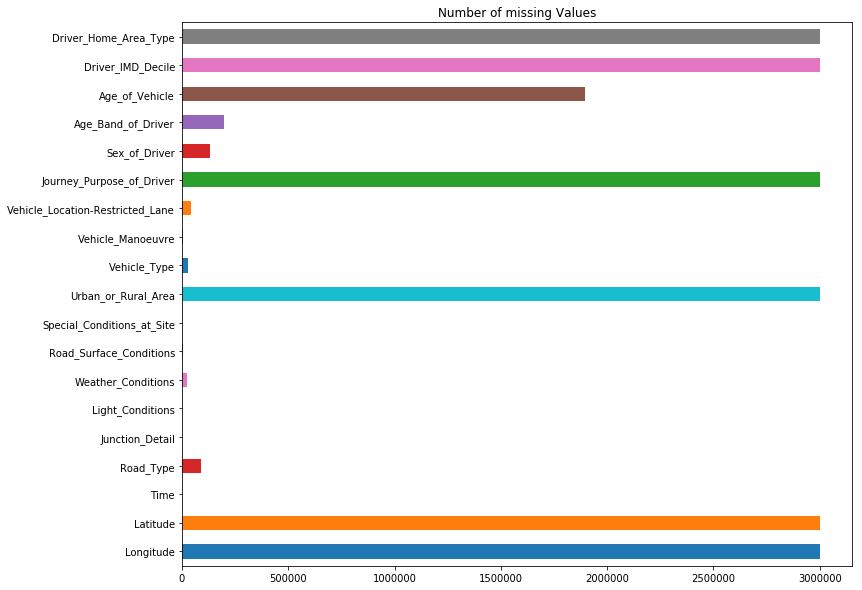

In [16]:
df7904b[cols_to_plot].isnull().sum().plot(figsize=(12,10), kind='barh', title='Number of missing Values')

From above, we can see that unfortunately our dataset has a large volume of null values, as well as 7 columns which are completely null: 

Latitude, Longitude, Urban_or_Rural_Area, Journey_Purpose_of_Driver, Age_of_Vehicle, Driver_IMD_Decile and Driver_Home_Area_Type.

## 2.2.3
### Dropping Rows with Missing Values

For the remaining rows which are not hugely effected by null values, we will create a new dataframe by using `dropna` to drop any rows with missing values in those columns.

If we were to use the 'dropna' method on rows within columns which have all or close to 100% missing values, we would end up with a dataset of 0 rows!

Once we have performed the dropna method on the specified rows below, we will use this new dataset to answer subsequent research questions

In [8]:
new_7904b = df7904b.dropna(subset=[ 
       'Time', 'Road_Type',
       'Junction_Detail', 'Light_Conditions', 'Weather_Conditions',
       'Road_Surface_Conditions', 'Special_Conditions_at_Site', 'Vehicle_Type',
       'Vehicle_Manoeuvre', 'Vehicle_Location-Restricted_Lane',
       'Sex_of_Driver', 'Age_Band_of_Driver',
]) 

new_7904b.shape

(2621931, 27)

## 2.2.4
### Saving Dataset to Pickle Files

Below we will save our 1979 - 2004 (b) dataset into two  pickle files for each of our research questions. We will specify only certain columns to be saved for each question, as not all are needed or relevant.

## Question One:

### (A) and (B):

In [11]:
pickle_save_time = %timeit -o new_7904b[cols_Q1AB].to_pickle("../../data/processed/500_prep_missing_values_7904b_Q1AB.pkl") #save dataset into a pickle file and print the save time

pickle_save_time

9.89 s ± 318 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<TimeitResult : 9.89 s ± 318 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)>

## Question Two:

### (A)

Unfortunately, for Question two part (A): _"Are newer cars safer than older cars?"_ our 'Age_of_Vehicle' column is essential for answering our question. As such, we will be unable to use this dataset for answering Question 2 Part (A)

### (B)

In [14]:
pickle_save_time = %timeit -o new_7904b[cols_Q2B].to_pickle("../../data/processed/500_prep_missing_values_df7904b_Q2B.pkl") #save dataset into a pickle file and print the save time

pickle_save_time

10.3 s ± 144 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<TimeitResult : 10.3 s ± 144 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)>

## Question Three:


### (A) & (B)

Unfortunately, for Question Three parts (A) and (B): 

* (A) _"Is it safer to drive in the city of London than in rural Surrey?"_ 
* (B) _"Do more deprived areas experience more road accidents than least deprived areas? (Liverpool vs. Wokingham)"_

Our 'Longitude' and 'Latitude' columns are essential for answering these questions. As such (since both columns are completely null in our dataset), we will be unable to use this dataset for answering Question 3.

## 2.3
## Dataset 2005 - 2014

## 2.3.1
### Locating Missing Values
Again, we will replace all '-1' and 'Unknown' values with NaN and remove them below.

### '-1' Values

For dealing with our '-1' values, we will replace each occurrance of -1 with an NaN value

In [3]:
df0514 = df0514.replace(-1,np.NaN)

### Unknown Values

Likewise for unknown values in our dataset, we will replace all occurrences of unknowns with Nan values.

In [4]:
df0514 = df0514.replace('unknown',np.NaN)

Within our dataset, we also have values labelled 'other/unknown (2005-10)' in our Journey_Purpose_of_Driver column. 

We need to replace each occurrence of this value with Nan in our datset also.

In [5]:
df0514 = df0514.replace('other/unknown (2005-10)',np.NaN)

## 2.3.2
### Null Values

Now that we have converted all of our missing values to NaN values, We can begin to study which columns are most impacted by missing data. 

The easiest way to do this is by using the Pandas isnull method to check whether a cell is missing data. This method generates True (missing) or False (not missing) values accordingingly.

We can count the missing values by using the _sum_ method to count the number of 'True' values that the _isnull_ method returns (which are treated as 1's).

In [6]:
df0514.isnull().sum()

Accident_Index                            0
Longitude                               200
Latitude                                198
Accident_Severity                         0
Number_of_Vehicles                        0
Number_of_Casualties                      0
Date                                      0
Day_of_Week                               0
Time                                    222
Local_Authority_(District)                0
Road_Type                             15993
Speed_limit                               0
Junction_Detail                          33
Light_Conditions                          0
Weather_Conditions                    56948
Road_Surface_Conditions                3806
Special_Conditions_at_Site               30
Urban_or_Rural_Area                     257
Vehicle_Type                          24778
Vehicle_Manoeuvre                      1080
Vehicle_Location-Restricted_Lane         74
Journey_Purpose_of_Driver           2153948
Sex_of_Driver                   

From the above output, we can see that there are quite a few null values present in this dataset, however not nearly as many as the two previous datasets (df7904a and df7904b).

Below we will plot the columns which have missing values to see which columns are most effected:

In [8]:
null_cols = ['Longitude', 'Latitude',
       'Time', 'Road_Type',
       'Junction_Detail', 'Weather_Conditions',
       'Road_Surface_Conditions', 'Special_Conditions_at_Site',
       'Urban_or_Rural_Area', 'Vehicle_Type', 'Vehicle_Manoeuvre',
       'Vehicle_Location-Restricted_Lane', 'Journey_Purpose_of_Driver',
       'Sex_of_Driver', 'Age_Band_of_Driver', 'Age_of_Vehicle',
       'Driver_IMD_Decile', 'Driver_Home_Area_Type']

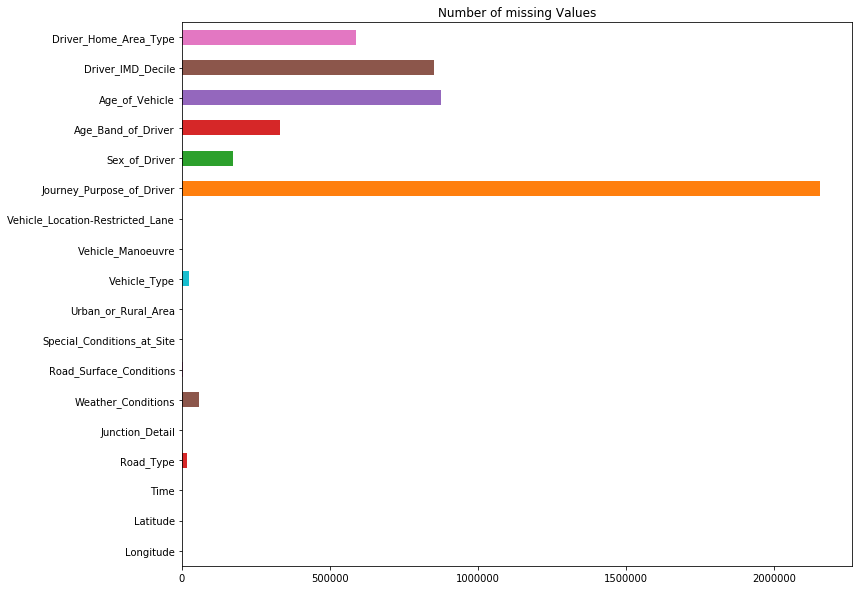

In [9]:
df0514[null_cols].isnull().sum().plot(figsize=(12,10), kind='barh', title='Number of missing Values')

From above, we can see that unfortunately our dataset contains a few null values, with the following rows most effected:

Journey_Purpose_of_Driver, Age_of_Vehicle, Driver_IMD_Decile and Driver_Home_Area_Type, Sex_of_Driver, Age_Band_of_Driver

Unlike before, we will create new dataframes for each question containing only the columns which are needed to answer those questions. We will then drop NaN rows from these dataframes and save the cleaned datasets to pickle files. We are doing this to ensure that we maximise the amount of data which we will have in our final datasets.

## 2.3.3
## Question One

### (A) & (B)


In [11]:
df_0514_Q1AB = df0514[cols_Q1AB].copy() #create a new dataframe, which is a copy of the original with only specified columns

In [46]:
df_0514_Q1AB.isnull().sum() #sum the number of null values for each column in the dataframe

Accident_Index                     0
Accident_Severity                  0
Number_of_Vehicles                 0
Number_of_Casualties               0
Date                               0
Day_of_Week                        0
Time                             222
Local_Authority_(District)         0
Light_Conditions                   0
Weather_Conditions             56948
Road_Surface_Conditions         3806
Vehicle_Type                   24778
Sex_of_Driver                 173756
Age_Band_of_Driver            330608
dtype: int64


## Dropping Rows with Some Missing Values

We will now create a new dataframe by using `dropna` to drop any rows with missing values in the columns provided.

In [47]:
new_0514_Q1AB = df_0514_Q1AB.dropna(subset=[ 
       'Time', 'Weather_Conditions',
       'Road_Surface_Conditions', 'Vehicle_Type',
       'Sex_of_Driver', 'Age_Band_of_Driver',
])

new_0514_Q1AB.shape

(2600036, 14)

### (C)

In [48]:
cols_Q1C = ['Accident_Index', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Light_Conditions', 'Weather_Conditions',
       'Road_Surface_Conditions', 'Vehicle_Type',
       'Sex_of_Driver', 'Age_Band_of_Driver', 'Journey_Purpose_of_Driver'] #define the columns to be used for Question 1 (C)

In [49]:
df_0514_Q1C = df0514[cols_Q1C].copy() #create a new dataframe, which is a copy of the original with only specified columns

In [51]:
df_0514_Q1C.isnull().sum() #sum the number of null values for each column in the dataframe

Accident_Index                      0
Accident_Severity                   0
Number_of_Vehicles                  0
Number_of_Casualties                0
Date                                0
Day_of_Week                         0
Time                              222
Local_Authority_(District)          0
Light_Conditions                    0
Weather_Conditions              56948
Road_Surface_Conditions          3806
Vehicle_Type                    24778
Sex_of_Driver                  173756
Age_Band_of_Driver             330608
Journey_Purpose_of_Driver     2153948
dtype: int64

## Dropping Rows with Some Missing Values

We will now create a new dataframe by using dropna to drop any rows with missing values in the columns provided

In [52]:
new_0514_Q1C = df_0514_Q1C.dropna(subset=[ 
       'Time', 'Weather_Conditions',
       'Road_Surface_Conditions', 'Vehicle_Type',
       'Sex_of_Driver', 'Age_Band_of_Driver', 'Journey_Purpose_of_Driver'
])

new_0514_Q1C.shape

(792713, 15)

## 2.3.4
## Question Two

### (A)

In [53]:
cols_Q2A = ['Accident_Index', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Light_Conditions', 'Weather_Conditions',
       'Road_Surface_Conditions', 'Special_Conditions_at_Site',
       'Vehicle_Type', 'Vehicle_Manoeuvre',
       'Sex_of_Driver', 'Age_of_Vehicle'] #define the columns to be used for Question 1 (C)

In [54]:
df_0514_Q2A = df0514[cols_Q2A].copy() #create a new dataframe, which is a copy of the original with only specified columns

In [55]:
df_0514_Q2A.isnull().sum() #sum the number of null values for each column in the dataframe

Accident_Index                     0
Accident_Severity                  0
Number_of_Vehicles                 0
Number_of_Casualties               0
Date                               0
Day_of_Week                        0
Time                             222
Local_Authority_(District)         0
Light_Conditions                   0
Weather_Conditions             56948
Road_Surface_Conditions         3806
Special_Conditions_at_Site        30
Vehicle_Type                   24778
Vehicle_Manoeuvre               1080
Sex_of_Driver                 173756
Age_of_Vehicle                874989
dtype: int64

## Dropping Rows with Some Missing Values

We will now create a new dataframe by using dropna to drop any rows with missing values in the columns provided

In [56]:
new_0514_Q2A = df_0514_Q2A.dropna(subset=[ 
       'Time', 'Weather_Conditions',
       'Road_Surface_Conditions', 'Special_Conditions_at_Site', 'Vehicle_Type',
       'Vehicle_Manoeuvre', 'Sex_of_Driver', 'Age_of_Vehicle',
])

new_0514_Q2A.shape

(2036044, 16)

### (B)

In [57]:
df_0514_Q2B = df0514[cols_Q2B].copy() #create a new dataframe, which is a copy of the original with only specified columns

In [58]:
df_0514_Q2B.isnull().sum() #sum the number of null values for each column in the dataframe

Accident_Index                     0
Accident_Severity                  0
Number_of_Vehicles                 0
Number_of_Casualties               0
Date                               0
Day_of_Week                        0
Time                             222
Local_Authority_(District)         0
Light_Conditions                   0
Weather_Conditions             56948
Road_Surface_Conditions         3806
Special_Conditions_at_Site        30
Vehicle_Type                   24778
Vehicle_Manoeuvre               1080
Sex_of_Driver                 173756
dtype: int64

## Dropping Rows with Some Missing Values

We will now create a new dataframe by using dropna to drop any rows with missing values in the columns provided

In [59]:
new_0514_Q2B = df_0514_Q2B.dropna(subset=[ 
       'Time', 'Weather_Conditions',
       'Road_Surface_Conditions', 'Special_Conditions_at_Site', 'Vehicle_Type',
       'Vehicle_Manoeuvre', 'Sex_of_Driver'
])

new_0514_Q2B.shape

(2759693, 15)

## 2.3.5
## Question Three:

### (A)

In [7]:
cols_Q3A = ['Accident_Index', 'Longitude', 'Latitude', 'Accident_Severity',
'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
'Time', 'Local_Authority_(District)',  'Speed_limit',  'Junction_Detail', 'Vehicle_Type', 'Urban_or_Rural_Area', 'Vehicle_Location-Restricted_Lane', 'Sex_of_Driver'
] #define columns for use in Question 3 (A)

In [8]:
df_0514_Q3A = df0514[cols_Q3A].copy() #create a new dataframe, which is a copy of the original with only specified columns

In [9]:
df_0514_Q3A.isnull().sum() #sum the number of null values for each column in the dataframe

Accident_Index                           0
Longitude                              200
Latitude                               198
Accident_Severity                        0
Number_of_Vehicles                       0
Number_of_Casualties                     0
Date                                     0
Day_of_Week                              0
Time                                   222
Local_Authority_(District)               0
Speed_limit                              0
Junction_Detail                         33
Vehicle_Type                         24778
Urban_or_Rural_Area                    257
Vehicle_Location-Restricted_Lane        74
Sex_of_Driver                       173756
dtype: int64

## Dropping Rows with Some Missing Values

We will now create a new dataframe by using dropna to drop any rows with missing values in the columns provided

In [10]:
new_0514_Q3A = df_0514_Q3A.dropna(subset=[
    'Longitude', 'Latitude', 'Time', 'Junction_Detail', 'Vehicle_Type', 
    'Urban_or_Rural_Area', 'Vehicle_Location-Restricted_Lane', 'Sex_of_Driver'])

new_0514_Q3A.shape

(2810328, 16)

### (B)

In [15]:
cols_Q3B = ['Accident_Index', 'Longitude', 'Latitude', 'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week', 'Local_Authority_(District)',
 'Special_Conditions_at_Site', 'Urban_or_Rural_Area', 'Vehicle_Type',
 'Sex_of_Driver',  'Driver_IMD_Decile'] # define columns to be used in Question 3 (B)

In [16]:
df_0514_Q3B = df0514[cols_Q3B].copy() #create a new dataframe, which is a copy of the original with only specified columns

In [17]:
df_0514_Q3B.isnull().sum() #sum the number of null values for each column in the dataframe

Accident_Index                     0
Longitude                        200
Latitude                         198
Number_of_Vehicles                 0
Number_of_Casualties               0
Date                               0
Day_of_Week                        0
Local_Authority_(District)         0
Special_Conditions_at_Site        30
Urban_or_Rural_Area              257
Vehicle_Type                   24778
Sex_of_Driver                 173756
Driver_IMD_Decile             849921
dtype: int64

In [18]:
df_0514_Q3B.columns #display columns in dataframe

Index(['Accident_Index', 'Longitude', 'Latitude', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Local_Authority_(District)', 'Special_Conditions_at_Site',
       'Urban_or_Rural_Area', 'Vehicle_Type', 'Sex_of_Driver',
       'Driver_IMD_Decile'],
      dtype='object')

## Dropping Rows with Some Missing Values

We will now create a new dataframe by using dropna to drop any rows with missing values in the columns provided

In [19]:
new_0514_Q3B = df_0514_Q3B.dropna(subset=[ 
     'Longitude', 'Latitude', 'Number_of_Vehicles',
       'Special_Conditions_at_Site',
       'Urban_or_Rural_Area', 'Vehicle_Type', 'Sex_of_Driver',
       'Driver_IMD_Decile'  
])

new_0514_Q3B.shape

(2133735, 13)

## 2.3.6
## Save Datasets to Pickle Files

Once all of our Null values have been dropped, and we have created our new dataframes, we will save each dataframe into a pickle file.

### Q1. (A) & (B)

In [68]:
pickle_save_time = %timeit -o new_0514_Q1AB.to_pickle("../../data/processed/500_prep_missing_values_0514_Q1AB.pkl") #save dataset into a pickle file and print the save time

pickle_save_time

8.77 s ± 88.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<TimeitResult : 8.77 s ± 88.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)>

### Q1. (C)

In [71]:
pickle_save_time = %timeit -o new_0514_Q1C.to_pickle("../../data/processed/500_prep_missing_values_0514_Q1C.pkl") #save dataset into a pickle file and print the save time

pickle_save_time

3.09 s ± 74.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<TimeitResult : 3.09 s ± 74.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)>

### Q2. (A)

In [72]:
pickle_save_time = %timeit -o new_0514_Q2A.to_pickle("../../data/processed/500_prep_missing_values_0514_Q2A.pkl") #save dataset into a pickle file and print the save time

pickle_save_time

7.9 s ± 203 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<TimeitResult : 7.9 s ± 203 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)>

### Q2. (B)

In [73]:
pickle_save_time = %timeit -o new_0514_Q2B.to_pickle("../../data/processed/500_prep_missing_values_0514_Q2B.pkl") #save dataset into a pickle file and print the save time

pickle_save_time

9.55 s ± 251 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<TimeitResult : 9.55 s ± 251 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)>

### Q3. (A)

In [11]:
pickle_save_time = %timeit -o new_0514_Q3A.to_pickle("../../data/processed/500_prep_missing_values_0514_Q3A.pkl") #save dataset into a pickle file and print the save time

pickle_save_time

9.66 s ± 95.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<TimeitResult : 9.66 s ± 95.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)>

### Q3. (B)

In [20]:
pickle_save_time = %timeit -o new_0514_Q3B.to_pickle("../../data/processed/500_prep_missing_values_0514_Q3B.pkl") #save dataset into a pickle file and print the save time

pickle_save_time

6.05 s ± 114 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<TimeitResult : 6.05 s ± 114 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)>

## 3.
# Create Data Dictionaries

Below we will create data dictionaries for each of our pickle files, to summarise their contents.

In [3]:
data_dictionary.save(
    '../../data/processed/500_prep_missing_values_0514_Q1AB.pkl', 

"""\
Aggregate raw data for road accidents.
""").head()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,Missing,%Missing
Accident_Index,2600036,1541466,2013460234852,66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
Accident_Severity,2600036,3,slight,2230664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
Number_of_Vehicles,2.60004e+06,NaN,NaN,NaN,2.10505,0.930225,1,2,2,2,67,0,0.0
Number_of_Casualties,2.60004e+06,NaN,NaN,NaN,1.45511,1.01975,1,1,1,2,93,0,0.0
Date,2600036,3652,21/10/2005,1400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0


In [4]:
data_dictionary.save(
    '../../data/processed/500_prep_missing_values_0514_Q1C.pkl', 

"""\
Aggregate raw data for road accidents.
""").head()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,Missing,%Missing
Accident_Index,792713,591495,200506X039355,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
Accident_Severity,792713,3,slight,684785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
Number_of_Vehicles,792713,NaN,NaN,NaN,2.09972,0.885037,1,2,2,2,67,0,0.0
Number_of_Casualties,792713,NaN,NaN,NaN,1.39917,0.993247,1,1,1,2,93,0,0.0
Date,792713,3652,07/12/2005,522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0


In [5]:
data_dictionary.save(
    '../../data/processed/500_prep_missing_values_0514_Q2A.pkl', 

"""\
Aggregate raw data for road accidents.
""").head()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,Missing,%Missing
Accident_Index,2036044,1351358,2013460234852,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
Accident_Severity,2036044,3,slight,1757834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
Number_of_Vehicles,2.03604e+06,NaN,NaN,NaN,2.11302,0.951588,1,2,2,2,67,0,0.0
Number_of_Casualties,2.03604e+06,NaN,NaN,NaN,1.478,1.03744,1,1,1,2,93,0,0.0
Date,2036044,3652,21/10/2005,1011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0


In [6]:
data_dictionary.save(
    '../../data/processed/500_prep_missing_values_0514_Q2B.pkl', 

"""\
Aggregate raw data for road accidents.
""").head()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,Missing,%Missing
Accident_Index,2759693,1571095,2013460234852,67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
Accident_Severity,2759693,3,slight,2377366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
Number_of_Vehicles,2.75969e+06,NaN,NaN,NaN,2.10598,0.9269,1,2,2,2,67,0,0.0
Number_of_Casualties,2.75969e+06,NaN,NaN,NaN,1.44225,1.00451,1,1,1,2,93,0,0.0
Date,2759693,3652,21/10/2005,1471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0


In [12]:
data_dictionary.save(
    '../../data/processed/500_prep_missing_values_0514_Q3A.pkl', 

"""\
Aggregate raw data for road accidents.
""").head()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,Missing,%Missing
Accident_Index,2810328,1601362,2013460234852,67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
Longitude,2.81033e+06,NaN,NaN,NaN,-1.42802,1.39369,-7.51623,-2.34529,-1.39056,-0.228997,1.76201,0,0.0
Latitude,2.81033e+06,NaN,NaN,NaN,52.558,1.42906,49.9129,51.487,52.2685,53.4516,60.7575,0,0.0
Accident_Severity,2810328,3,slight,2423471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
Number_of_Vehicles,2.81033e+06,NaN,NaN,NaN,2.10489,0.930107,1,2,2,2,67,0,0.0


In [21]:
data_dictionary.save(
    '../../data/processed/500_prep_missing_values_0514_Q3B.pkl', 

"""\
Aggregate raw data for road accidents.
""").head()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,Missing,%Missing
Accident_Index,2133735,1325488,2013460234852,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
Longitude,2.13374e+06,NaN,NaN,NaN,-1.19098,1.22116,-7.50412,-2.06828,-1.22207,-0.190866,1.76201,0,0.0
Latitude,2.13374e+06,NaN,NaN,NaN,52.3433,1.15,49.9129,51.4563,52.1328,53.3776,60.311,0,0.0
Number_of_Vehicles,2.13374e+06,NaN,NaN,NaN,2.11117,0.921435,1,2,2,2,67,0,0.0
Number_of_Casualties,2.13374e+06,NaN,NaN,NaN,1.45142,1.00674,1,1,1,2,93,0,0.0


In [9]:
data_dictionary.save(
    '../../data/processed/500_prep_missing_values_7904a_Q1AB.pkl', 

"""\
Aggregate raw data for road accidents.
""").head()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,Missing,%Missing
Accident_Index,2411743,1483732,198213Q011682,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
Accident_Severity,2411743,3,slight,1730154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
Number_of_Vehicles,2.41174e+06,NaN,NaN,NaN,1.97715,0.965106,1,2,2,2,61,0,0.0
Number_of_Casualties,2.41174e+06,NaN,NaN,NaN,1.36533,0.918827,1,1,1,1,62,0,0.0
Date,2411743,2922,25/11/1983,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0


In [10]:
data_dictionary.save(
    '../../data/processed/500_prep_missing_values_7904a_Q2B.pkl', 

"""\
Aggregate raw data for road accidents.
""").head()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,Missing,%Missing
Accident_Index,2411743,1483732,198213Q011682,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
Accident_Severity,2411743,3,slight,1730154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
Number_of_Vehicles,2.41174e+06,NaN,NaN,NaN,1.97715,0.965106,1,2,2,2,61,0,0.0
Number_of_Casualties,2.41174e+06,NaN,NaN,NaN,1.36533,0.918827,1,1,1,1,62,0,0.0
Date,2411743,2922,25/11/1983,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0


In [11]:
data_dictionary.save(
    '../../data/processed/500_prep_missing_values_7904b_Q1AB.pkl', 

"""\
Aggregate raw data for road accidents.
""").head()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,Missing,%Missing
Accident_Index,2621931,1561968,199213MU34592,192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
Accident_Severity,2621931,3,slight,2047923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
Number_of_Vehicles,2.62193e+06,NaN,NaN,NaN,2.09329,2.07594,1,2,2,2,192,0,0.0
Number_of_Casualties,2.62193e+06,NaN,NaN,NaN,1.39845,0.977695,1,1,1,1,70,0,0.0
Date,2621931,2922,03/07/1992,2211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0


In [12]:
data_dictionary.save(
    '../../data/processed/500_prep_missing_values_df7904b_Q2B.pkl', 

"""\
Aggregate raw data for road accidents.
""").head()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,Missing,%Missing
Accident_Index,2621931,1561968,199213MU34592,192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
Accident_Severity,2621931,3,slight,2047923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
Number_of_Vehicles,2.62193e+06,NaN,NaN,NaN,2.09329,2.07594,1,2,2,2,192,0,0.0
Number_of_Casualties,2.62193e+06,NaN,NaN,NaN,1.39845,0.977695,1,1,1,1,70,0,0.0
Date,2621931,2922,03/07/1992,2211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
